In [3]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_gradle
import rq_aux
import re
import matplotlib.pyplot as plt 
import seaborn as sns

importlib.reload(regex_gradle)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [4]:
regex = regex_gradle
plugins = regex.plugins
categories = regex.categories
prefix = "gradle_"
build_tool = "gradle"
is_build_tool = "is_gradle"
noerror = False
output_path = "../data/output_data/"
#overview_dataset = f"{output_path}overview_daylight_noerror.csv"
#alltasks_dataset = f"{output_path}all_tasks_noerror.csv"

overview_dataset = f"{output_path}overview_cloc2_noerror.csv"
alltasks_dataset = f"{output_path}all_tasks_cloc2_noerror.csv"

In [5]:
rq_aux.check_categories(regex)

In [6]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Build tool gradle = 46022


In [7]:
tasks = {}
for x in sizes1:
  tasks[x] = rq_aux.get_tasks_by_kind(df[df["size"] == x], plugins)

tasks['all'] = rq_aux.get_tasks_by_kind(df, plugins)

In [8]:
sum_tasks = {}
for x in sizes2:
  sum_tasks[x] = rq_aux.calc_energy_by_task(tasks[x])


In [9]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_all_tasks(rq_aux.filter_tasks_by(sum_tasks[x], '', 0.02))
  print("")

**** All ****
total: Energy: 6388768.076894071 (100.0%)
test: Energy: 1857434.1588290243 (29.1%)
jmh: Energy: 666912.250396649 (10.4%)
other: Energy: 627508.2882072072 (9.8%)
build: Energy: 287104.89979383413 (4.5%)
javadoc: Energy: 285013.2394670046 (4.5%)
publish: Energy: 261143.76227375818 (4.1%)
func_test: Energy: 243159.86741640556 (3.8%)
compile: Energy: 202475.830026166 (3.2%)
jar: Energy: 199982.63423470547 (3.1%)
build_src: Energy: 177420.7789023028 (2.8%)
checkstyle: Energy: 168547.39532929013 (2.6%)
test_class: Energy: 150216.05098475574 (2.4%)

**** Small ****
total: Energy: 162477.96577686045 (100.0%)
plugin-verifier: Energy: 93421.4843739821 (57.5%)
other: Energy: 23886.733312948676 (14.7%)
test: Energy: 8279.375270276762 (5.1%)
jar: Energy: 5478.76339982698 (3.4%)
javadoc: Energy: 5121.020993234899 (3.2%)
spotless: Energy: 4819.1230120089485 (3.0%)
compile: Energy: 3370.117706301797 (2.1%)
resources: Energy: 3285.275331639101 (2.0%)

**** Medium ****
total: Energy: 20987

In [10]:
df = pd.read_csv(overview_dataset)

# Remove Maven Workflows Without Maven Subtasks
df = rq_aux.remove_workflows_no_subtask(df[df[is_build_tool]], prefix, plugins)

df_size = rq_aux.create_dfs_size(df, is_build_tool)

Workflows No Subtask: Removed 306 workflows: 734 -> 428


In [11]:
# Calculate build tool-related energy consumption for all build tool wookflows
tasks = {}

for x in sizes2:
  print(f"*** {x.title()} ***")
  tasks[x] = rq_aux.calc_sum(df_size[x], prefix, plugins)
  rq_aux.calc_workflow_energy_proportion (df_size[x], tasks[x])
  rq_aux.calc_ratio(tasks[x])
  print(f"{df_size[x]['energy'].sum():0.2f}")  
  

*** All ***
Energy:  6388768 (28.5%)
Seconds:  295917770296 (26.2%)
22451285.32
*** Small ***
Energy:  162478 (39.7%)
Seconds:  7912732769 (36.2%)
408979.87
*** Medium ***
Energy:  2098761 (36.2%)
Seconds:  95167688276 (33.5%)
5796712.06
*** Large ***
Energy:  4127529 (25.4%)
Seconds:  192837349251 (23.5%)
16245593.39


/Users/sergio/pesquisa/ICT4S_2025/analysis/../scripts/rq_aux.py:46: RuntimeWarning: invalid value encountered in scalar divide
  return round(100 * x / y, n)


In [12]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_tasks_summary(rq_aux.filter_tasks_by(tasks[x], 'energy', 0.02))
  print("")

**** All ****
*** Total ***
N:  100.0%;  Energy:  100.0%;  Seconds:  100.0%;  Rat_P:  nan%;  Rat_N:  100.0%;  
*** Gradle_Test ***
N:  4.7%;  Energy:  29.1%;  Seconds:  26.5%;  Rat_P:  nan%;  Rat_N:  615.5%;  
*** Gradle_Jmh ***
N:  0.9%;  Energy:  10.4%;  Seconds:  14.9%;  Rat_P:  nan%;  Rat_N:  1152.1%;  
*** Gradle_Other ***
N:  29.1%;  Energy:  9.8%;  Seconds:  9.5%;  Rat_P:  nan%;  Rat_N:  33.7%;  
*** Gradle_Build ***
N:  4.6%;  Energy:  4.5%;  Seconds:  4.9%;  Rat_P:  nan%;  Rat_N:  96.8%;  
*** Gradle_Javadoc ***
N:  3.9%;  Energy:  4.5%;  Seconds:  3.6%;  Rat_P:  nan%;  Rat_N:  115.7%;  
*** Gradle_Publish ***
N:  0.4%;  Energy:  4.1%;  Seconds:  3.3%;  Rat_P:  nan%;  Rat_N:  908.8%;  
*** Gradle_Func_Test ***
N:  0.1%;  Energy:  3.8%;  Seconds:  4.0%;  Rat_P:  nan%;  Rat_N:  4272.2%;  
*** Gradle_Compile ***
N:  5.5%;  Energy:  3.2%;  Seconds:  2.8%;  Rat_P:  nan%;  Rat_N:  57.7%;  
*** Gradle_Jar ***
N:  7.7%;  Energy:  3.1%;  Seconds:  2.9%;  Rat_P:  nan%;  Rat_N:  40.4%;  

In [13]:
energy_category = {}

for x in sizes2:
  energy_category[x] = rq_aux.calc_energy_category(categories, plugins, 'energy', tasks[x], prefix)

print(energy_category['all'])
print(sum(energy_category['all'].values()))
print(tasks['all']["total"]["energy"], tasks['all'][prefix + "other"]["energy"])

{'Integration Test': 371297.2355633969, 'Unit Test': 1915662.6134352088, 'Compile': 1534869.0303685928, 'Documentation': 314006.4287741668, 'Install': 16951.2923445133, 'Linter': 449295.64988046675, 'Packaging': 579711.7122215633, 'Others': 579465.8260989584, 'Unclassified': 627508.288207208}
6388768.076894076
6388768.076894074 627508.288207208


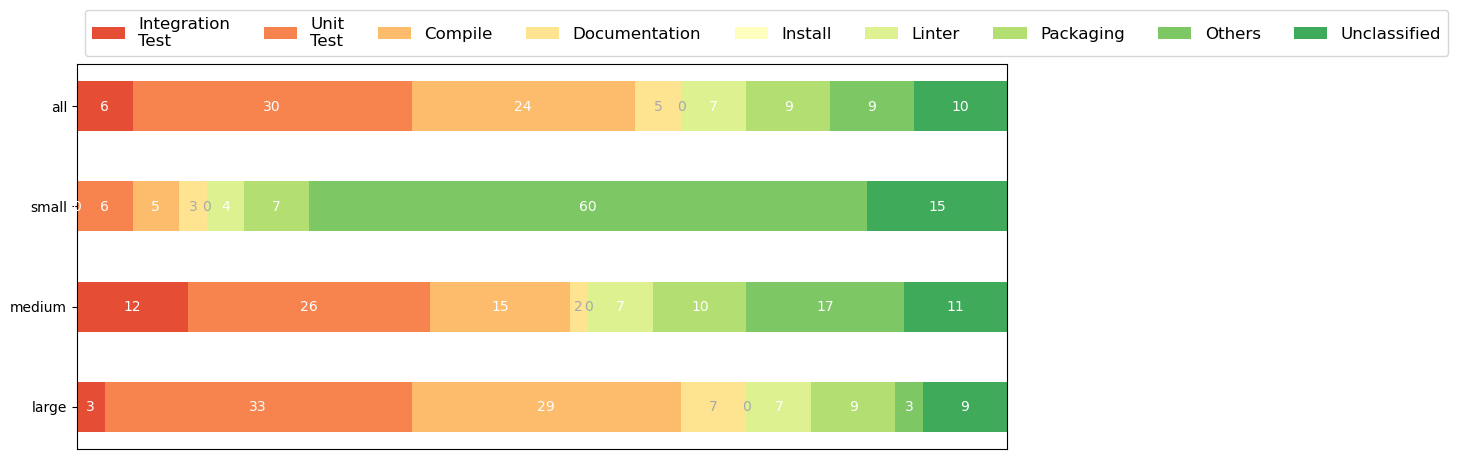

In [14]:
cat_ratios = {}
for key, value in energy_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in energy_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()


In [15]:
n_category = {}

for x in sizes2:
  n_category[x] = rq_aux.calc_energy_category(categories, plugins, 'n', tasks[x], prefix)

print(n_category['all'])
print(sum(n_category['all'].values()))
print(tasks['all']["total"]["n"], tasks['all'][prefix + "other"]["n"])

{'Integration Test': 262, 'Unit Test': 2585, 'Compile': 8790, 'Documentation': 1890, 'Install': 114, 'Linter': 4060, 'Packaging': 11579, 'Others': 3333, 'Unclassified': 13409}
46022
46022 13409


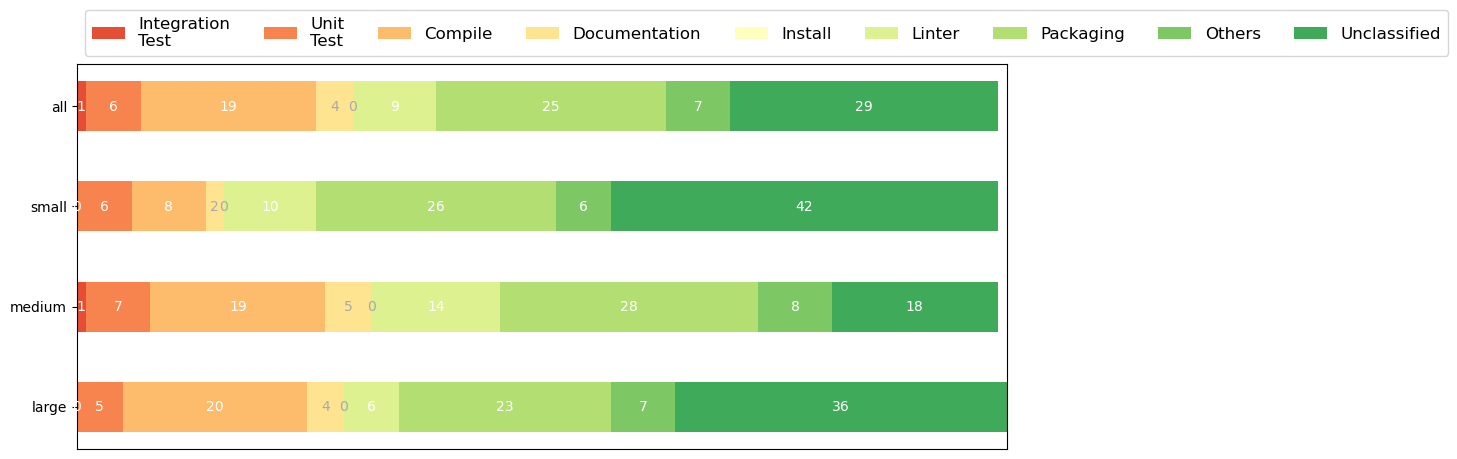

In [16]:
cat_ratios = {}
for key, value in n_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in n_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()

In [17]:
time_category = {}

for x in sizes2:
  time_category[x] = rq_aux.calc_energy_category(categories, plugins, 'seconds', tasks[x], prefix)

print(time_category['all'])
print(sum(time_category['all'].values()))
print(tasks['all']["total"]["seconds"], tasks['all'][prefix + "other"]["seconds"])

{'Integration Test': 19331294105, 'Unit Test': 81405467659, 'Compile': 82316105139, 'Documentation': 11766262870, 'Install': 1039070294, 'Linter': 18805817977, 'Packaging': 24463565979, 'Others': 28536695717, 'Unclassified': 28253490556}
295917770296
295917770296 28253490556


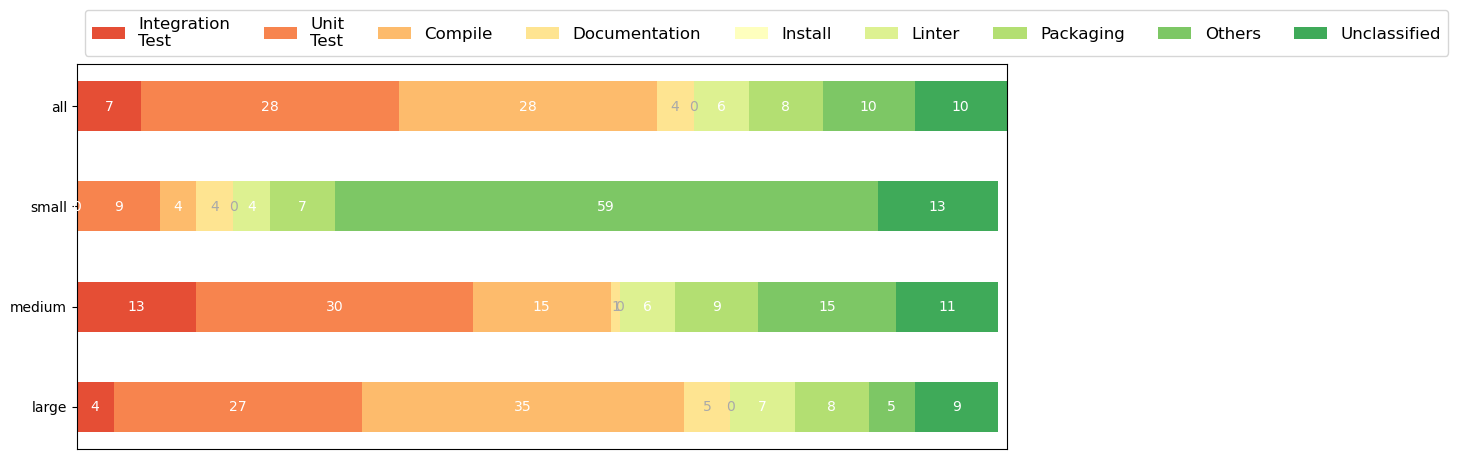

In [18]:
cat_ratios = {}
for key, value in time_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in time_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()